In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow


import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
county_df = wrangle_zillow.wrangle_county_fips()

In [4]:
county_df

,County
fips_number,
6037,Los Angeles County
6059,Orange County
6111,Ventura County


In [5]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [6]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County


In [9]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [10]:
la_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Los Angeles County']
orange_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Orange County']
ventura_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Ventura County']

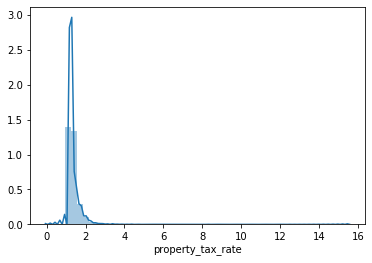

In [11]:
la_county_tax_rates_distplot = sns.distplot(la_county_tax_rates)

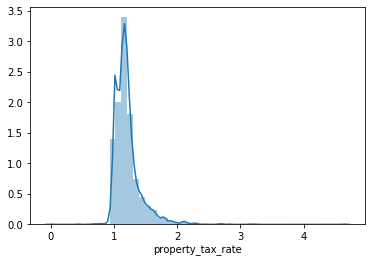

In [12]:
orange_county_tax_rates_displot = sns.distplot(orange_county_tax_rates)

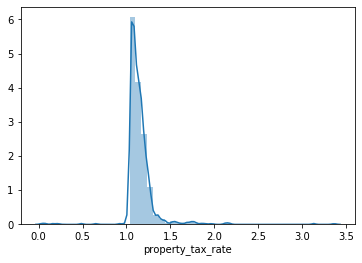

In [13]:
ventura_county_tax_rates_displot = sns.distplot(ventura_county_tax_rates)